In [25]:
#Using Spotipy, a lightweight Python library for the Spotify Web API. Guide at link below
#https://spotipy.readthedocs.io/en/latest/#
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import spotipy, sys, csv
import pprint as pp
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from spotipy.oauth2 import SpotifyClientCredentials

#Load Application ID and API Key for Spotify API
client_credentials_manager = SpotifyClientCredentials(client_id='0de0796ce8d6430d9896525ccb8c845d',
                                                      client_secret='4b1c63bc8de34e7a9cc75b105f3c3875')
spotify = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [12]:
#Read in csv of Singles and convert to DataFrame
top100singles = pd.read_csv('top100singles.csv')
list_of_dicts = []

#Loop Through all Singles in top100 singles csv
for index,row in top100singles.iterrows():
    
    title_and_artist = row['Single'] + ' ' + row['Artist']

    #Make API Call using search method, querying for "Title, Artist"
    #Limit to just the top response
    results = spotify.search(q=title_and_artist, type='track',limit=1)

    #temporary dictionary to store all of the track details
    temp = {}
    temp['name'] = results['tracks']['items'][0]['name']
    temp['popularity'] = results['tracks']['items'][0]['popularity']

    #if there are multiple artist on album, store as one value separated by commas
    multi_Artist = False
    for j in range(len(results['tracks']['items'][0]['artists'])):
        if multi_Artist == False:
            temp['artists'] = results['tracks']['items'][0]['artists'][j]['name']
            multi_Artist = True
        else:
            temp['artists'] = temp['artists'] + ', ' + results['tracks']['items'][0]['artists'][j]['name']

    list_of_dicts.append(temp)

In [13]:
#convert list of dictionaries to DataFrame, make index start at 1 instead of 0
df = pd.DataFrame(list_of_dicts)
df.columns = ['Artist(s)', 'Title (Spotify)','Popularity']
df.head()

,Artist(s),Title (Spotify),Popularity
0,"Bing Crosby, Ken Darby Singers, John Scott Tro...",White Christmas,72
1,Elton John,Something About The Way You Look Tonight - Edi...,60
2,Mungo Jerry,In the Summertime,67
3,Bing Crosby,Silent Night,47
4,Bill Haley & His Comets,(We're Gonna) Rock Around The Clock,61


In [15]:
#concatenate results, and start index at 1
wiki_and_spotify = pd.concat([top100singles,df],axis=1)
wiki_and_spotify.index += 1
wiki_and_spotify.head()

,Artist,Single,Release Year,Sales (in millions),Artist(s),Title (Spotify),Popularity
1,Bing Crosby,White Christmas,1942,50.0,"Bing Crosby, Ken Darby Singers, John Scott Tro...",White Christmas,72
2,Elton John,Candle in the Wind 1997 / Something About the ...,1997,33.0,Elton John,Something About The Way You Look Tonight - Edi...,60
3,Mungo Jerry,In the Summertime,1970,30.0,Mungo Jerry,In the Summertime,67
4,Bing Crosby,Silent Night,1935,30.0,Bing Crosby,Silent Night,47
5,Bill Haley & His Comets,Rock Around the Clock,1954,25.0,Bill Haley & His Comets,(We're Gonna) Rock Around The Clock,61


In [11]:
wiki_and_spotify.to_csv('output.csv',index=False)

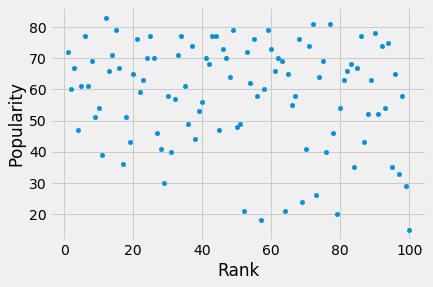

In [29]:
wiki_and_spotify.reset_index().plot(x='index',y='Popularity',kind='scatter').set_xlabel("")
plt.show()

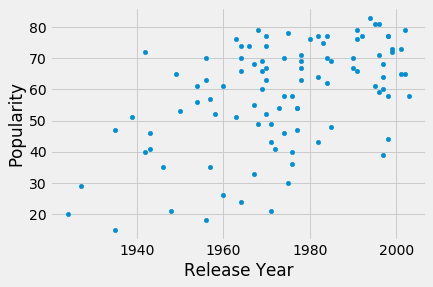

In [28]:
wiki_and_spotify.reset_index().plot(x='Release Year',y='Popularity',kind='scatter')
plt.show()

In [51]:
#Read in csv of Singles and convert to DataFrame
top74albums = pd.read_csv('top74albums.csv')
list_of_dicts = []

#Loop Through all Singles in top100 singles csv
for index,row in top74albums.iterrows():
    
    album = row['Album'] + ', ' + row['Artist']

    #Make API Call using search method, querying for "Title, Artist"
    #Limit to just the top response
    results = spotify.search(q=album, type='album',limit=1)


    #temporary dictionary to store all of the track details
    temp = {}
    
    if len(results['albums']['items']) > 0:
        temp['name'] = results['albums']['items'][0]['name']
        temp['release_date'] = results['albums']['items'][0]['release_date']
        temp['total_tracks'] = results['albums']['items'][0]['total_tracks']

        #if there are multiple artist on album, store as one value separated by commas
        multi_Artist = False
        for k in range(len(results['albums']['items'][0]['artists'])):
            if multi_Artist == False:
                temp['artists'] = results['albums']['items'][0]['artists'][k]['name']
                multi_Artist = True
            else:
                temp['artists'] = temp['artists'] + ', ' + results['albums']['items'][0]['artists'][k]['name']

        list_of_dicts.append(temp)

album_df = pd.DataFrame(list_of_dicts)
album_df

,artists,name,release_date,total_tracks
0,Michael Jackson,Thriller 25 Super Deluxe Edition,1982-11-30,30
1,AC/DC,Back In Black,1980-07-25,10
2,Meat Loaf,Bat Out Of Hell,1977-10-21,7
3,Pink Floyd,The Dark Side of the Moon,1973-03-01,10
4,Michael Jackson,Bad 25th Anniversary,1987-08-31,24
5,Whitney Houston,The Bodyguard - Original Soundtrack Album,1992-11-17,12
6,Eagles,Their Greatest Hits 1971-1975 (2013 Remaster),1976,10
7,Twinkle Twinkle Little Rock Star,Lullaby Versions of Saturday Night Fever & Bee...,2015-01-26,6
8,Fleetwood Mac,Rumours (Super Deluxe),1977-02-04,58
9,Shania Twain,Come On Over,1997-11-04,16
